In [75]:
import pandas as pd
import numpy as np
import os

In [76]:
#데이터 여기만 업데이트 하면 됨
daily_sales = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\daily_sales_2020-07-01_2020-07-27.csv")
google = pd.read_excel("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\google_adreport_200727.xlsx")
fb_total = pd.read_excel("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\Untitled-report-Jul-1-2020-Jul-27-2020.xlsx")

In [107]:
fb_total = fb_total.fillna(0)
fb_total['Platform'], fb_total['setdetail'] = fb_total['Ad name'].str.split(':', 1).str

In [108]:
facebook = fb_total.query("Platform == ['FB']")
instagram = fb_total.query("Platform == ['Instagram post']")

In [109]:
instagram = instagram[['Ad name', 'Day', 'Delivery status', 'Delivery level', 'Reach',
       'Amount spent (GBP)', 'Impressions', 'Link clicks', 'Purchases',
       'Mobile app purchases', 'Website purchases', 'On-Facebook purchases',
       'Frequency', 'Cost per 1,000 people reached',
       'CPM (cost per 1,000 impressions)', 'Post comments', 'Post engagement',
       'Post reactions', 'Post saves', 'Post shares', 'Reporting starts',
       'Reporting ends']]


In [110]:
facebook['setdate'], facebook['targeting'], facebook['creative'] = facebook['setdetail'].str.split('_',2).str
facebook = facebook[['setdate', 'targeting',
       'creative', 'Day', 'Delivery status', 'Delivery level', 'Reach',
       'Amount spent (GBP)', 'Impressions', 'Link clicks', 'Purchases',
       'Mobile app purchases', 'Website purchases', 'On-Facebook purchases',
       'Frequency', 'Cost per 1,000 people reached',
       'CPM (cost per 1,000 impressions)', 'Post comments', 'Post engagement',
       'Post reactions', 'Post saves', 'Post shares', 'Reporting starts',
       'Reporting ends']]

In [111]:
facebook = facebook[facebook['Impressions'] != 0]
instagram = instagram[instagram['Impressions'] != 0]

In [112]:
facebook = facebook.sort_values(by='Day')
instagram = instagram.sort_values(by='Day')

In [113]:
google = google[google["Impr."] != 0]

In [114]:
google = google[['Ad status', 'Ad type', 'Final URL', 'Ad name',
       'Day', 'Campaign', 'Ad group',
       'Status', 'Interactions', 'Impr.', 'Interaction rate', 'Currency code',
       'Avg. cost', 'Cost', 'Conversions', 'Cost / conv.', 'Conv. rate']]
google = google.sort_values('Day')

In [115]:
google.loc[google["Ad type"] == "Product ad", "Ad name"] = "Shopping Ad"
google.loc[google["Ad type"] == "Responsive display ad", "Ad name"] = "Retargeting"
google['Final URL'].fillna("https://www.kakaofriendsstore.com/", inplace = True)

In [116]:
facebook_daily = pd.pivot_table(facebook, index ='Day', values=['Amount spent (GBP)', 'Impressions', 'Link clicks', 'Purchases'], aggfunc= np.sum)
facebook_targeting = pd.pivot_table(facebook, index=['targeting', 'creative', 'Day'], values=['Amount spent (GBP)', 'Impressions', 'Link clicks', 'Purchases'], aggfunc= np.sum)
facebook_creative = pd.pivot_table(facebook, index=['creative', 'Day'], values=['Amount spent (GBP)', 'Impressions', 'Link clicks', 'Purchases'], aggfunc= np.sum)

In [117]:
instagram_daily = pd.pivot_table(instagram, index='Day', values=['Amount spent (GBP)', 'Impressions',
       'Link clicks', 'Purchases'], aggfunc= np.sum, fill_value=0)

In [118]:
google_daily = pd.pivot_table(google, index='Day', values=['Cost', 'Impr.', 'Interactions', 'Conversions'], aggfunc= np.sum)

In [119]:
xlxs_dir = "C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\200727_paidtotal.xlsx"

with pd.ExcelWriter(xlxs_dir) as writer:
    facebook.to_excel(writer, sheet_name = 'Facebook', index = False)
    instagram.to_excel(writer, sheet_name = 'Instagram', index = False)
    google.to_excel(writer, sheet_name = 'Google', index = False)
    facebook_daily.to_excel(writer, sheet_name='Facebook_daily', index=True)
    facebook_targeting.to_excel(writer, sheet_name='Facebook_targeting', index=True)
    facebook_creative.to_excel(writer, sheet_name='Facebook_creative', index=True)
    instagram_daily.to_excel(writer, sheet_name='Instagram_daily', index=True)    
    google_daily.to_excel(writer, sheet_name='Google_daily', index=True)    

In [120]:
# import matplotlib.pyplot as plt


# plt.figure(figsize=(25,7))

# plt.subplot(1,2,1) 
# plt.title('Paid Channel Impression', fontsize = 15)
# plt.xlabel('Day', fontsize = 15)
# plt.ylabel('Impression', fontsize = 15)
# plt.xticks(rotation = 45)

# plt.plot(facebook_daily['Impressions'], marker= 'o', linestyle='-', color='c')
# #plt.figure() 그래프 분리해서 그리고 싶을 때
# plt.plot(instagram_daily['Impressions'], marker = '*', linestyle = '--', color = 'y')
# plt.plot(google_daily['Impr.'], marker ='+', linestyle = ':', color= 'r')

# plt.legend(['Facebook', 'Instagram', 'Google'], fontsize = 15)


# plt.subplot(1,2,2)
# plt.title('Daily Conversion', fontsize = '15')
# plt.xlabel('Day', fontsize = 15)
# plt.ylabel('Conversion', fontsize = 15)
# plt.xticks(rotation=45)
# plt.plot(facebook_daily['Purchases'],marker = 'o', linestyle = '-', color='c')
# plt.plot(instagram_daily['Purchases'], marker = '*',linestyle = '--', color = 'y')  
# plt.plot(google_daily['Conversions'], marker = '+', linestyle = ':', color = 'r')

# plt.legend(['Facebook', 'Instagram', 'Google'], fontsize = 15)

# plt.show()

In [121]:
total_daily_impression = pd.concat([facebook_daily['Impressions'], instagram_daily['Impressions'], google_daily['Impr.']], axis=1)
total_daily_impression.columns.values[:] = 'Facebook', 'Instagram', 'Google'

In [122]:
total_daily_cost = pd.concat([facebook_daily['Amount spent (GBP)'], instagram_daily['Amount spent (GBP)'], google_daily['Cost']], axis=1)
total_daily_cost.columns.values[:] = 'Facebook', 'Instagram', 'Google'
total_daily_cost = total_daily_cost.fillna(0)

In [123]:
facebook_creative_overall = pd.pivot_table(facebook, index=['creative'], values=['Amount spent (GBP)', 'Impressions', 'Link clicks', 'Purchases'], aggfunc= np.sum)

In [124]:
facebook_creative_overall = facebook_creative_overall.sort_values(by = 'Amount spent (GBP)', ascending=False)

In [125]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import rc

Text(0.5, 1.0, 'Facebook Targeting Budget(£)')

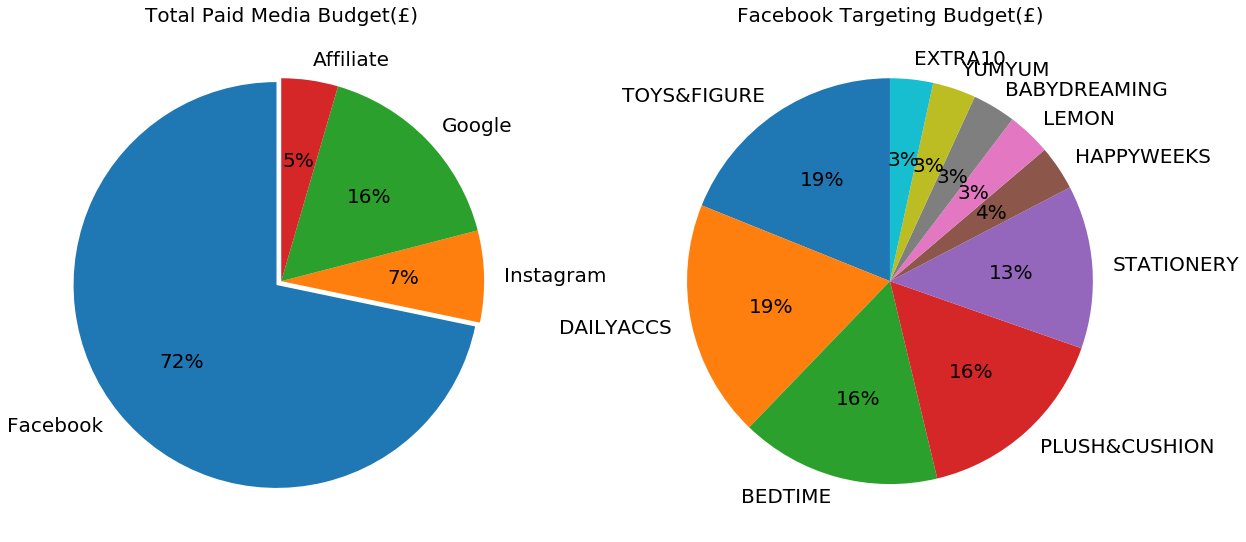

In [126]:
plt.rcParams['figure.figsize'] = [20, 10]


plt.subplot(1,2,1)

labels = ['Facebook', 'Instagram', 'Google', 'Affiliate']
sizes = numpy.array([total_daily_cost['Facebook'].sum(), total_daily_cost['Instagram'].sum(), total_daily_cost['Google'].sum(), 70.73])
explode = (0.03, 0, 0, 0)

# def absolute_value(val):
#     a  = val/100.*sizes.sum()
#     a = round(a, 1)
#     return a

patches, texts, autotexts = plt.pie(sizes, explode = explode, labels=labels, autopct = '%1.0f%%', shadow = False, startangle=90)
#patches, texts, autotexts = plt.pie(sizes, explode = explode, labels=labels, autopct = absolute_value, shadow = False, startangle=180, labeldistance=1.05)

plt.title('Total Paid Media Budget(£)', fontsize = 20)

for t in texts:
    t.set_fontsize(20)
for t in autotexts:
    t.set_fontsize(20)


plt.subplot(1,2,2)

creative_labels = []
for i in range(len(facebook_creative_overall.index)):
    creative_labels.append(facebook_creative_overall.index[i])

creative_sizes = []

for i in range(len(facebook_creative_overall.index)):
    creative_sizes.append(facebook_creative_overall['Amount spent (GBP)'][i])

creative_sizes = numpy.array(creative_sizes)
patches, texts, autotexts = plt.pie(creative_sizes, labels=creative_labels, autopct = '%0.0f%%', shadow = False, startangle=90, labeldistance=1.1)
#patches, texts, autotexts = plt.pie(creative_sizes, labels=creative_labels, autopct = absolute_value, shadow = False, startangle=90, labeldistance=1.1)

for t in texts:
    t.set_fontsize(20)
for t in autotexts:
    t.set_fontsize(20)
    
#plt.legend(bbox_to_anchor=(1,0.3))
plt.title('Facebook Targeting Budget(£)', fontsize = 20)

<Figure size 720x360 with 0 Axes>

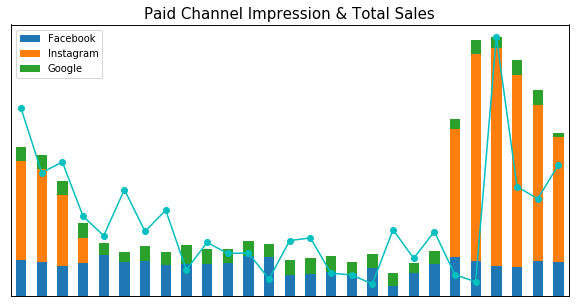

In [127]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['figure.figsize'] = (10, 5)

fig = plt.figure()
ax = total_daily_impression.plot.bar(stacked=True)

ax2 = ax.twinx()
ax2.plot(daily_sales['total_sales'].values, marker = 'o', linestyle = '-', color='c')


plt.title('Paid Channel Impression & Total Sales', fontsize=15)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Impression', fontsize =10)
ax2.set_ylabel('Total Sales(£)', fontsize= 10)

#축값 없애고 싶을 때
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
